In [1]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
neymar = [12541000, 11029000, 16921000, 28615000, 43300000, 43300000, 43300000, 56360000, 56360000, 56360000, 56360000]
messi = [20543000, 29631000, 28474000, 38284000, 39621000, 70758000, 71000000, 71000000, 63640000, 63640000, 63640000]
cr7 = [29026024, 25660189, 29659535, 29736991, 30776506, 50701261, 50703911, 50703911, 26780000, 26780000/2, 200000000]
cambio = [3.25, 3.02, 4.33, 3.40, 3.95, 4.17, 4.75, 6.62, 5.95, 5.62, 5.62]

neymar = list(np.array(neymar) * np.array(cambio))
messi = list(np.array(messi) * np.array(cambio))
cr7 = list(np.array(cr7) * np.array(cambio))


neymar

[40758250.0,
 33307580.0,
 73267930.0,
 97291000.0,
 171035000.0,
 180561000.0,
 205675000.0,
 373103200.0,
 335342000.0,
 316743200.0,
 316743200.0]

In [3]:
jogadores = [neymar, messi, cr7]
nome_jogadores = ["Neymar", "Messi", "CR7"]

anos = list(range(2014, 2024))

anos

[2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]

In [4]:
df_salarios = pd.DataFrame(0, index = anos, columns = nome_jogadores)


for z, jogador in enumerate(jogadores):
    
    salario_anual = []
    
    for i, ano in enumerate(anos):
        
        if jogador != cr7:
            
            salario = jogador[i]/2 + jogador[i + 1]/2
            
            salario_anual.append(salario)
            
        else:
            
            if ano == 2022:
                
                salario = jogador[i]/2 + jogador[i + 1]
            
                salario_anual.append(salario)
                
            elif ano == 2023:
                
                salario = jogador[i + 1]
            
                salario_anual.append(salario)
                
            else:
                
                salario = jogador[i]/2 + jogador[i + 1]/2
            
                salario_anual.append(salario)
                
                         
            
    df_salarios[nome_jogadores[z]] = salario_anual
            
            
            
            
        
df_salarios       

,Neymar,Messi,CR7
2014,37032915.0,78125185.0,8.591417e+07
2015,53287755.0,106389020.0,1.029598e+08
2016,85279465.0,126729010.0,1.147658e+08
2017,134163000.0,143334275.0,1.113365e+08
2018,175798000.0,225781905.0,1.664957e+08
2019,193118000.0,316155430.0,2.261339e+08
2020,289389100.0,403635000.0,2.882517e+08
2021,354222600.0,424339000.0,2.475004e+08
2022,326042600.0,368157400.0,1.549223e+08
2023,316743200.0,357656800.0,1.124000e+09


In [5]:
params = {"ytick.color" : "w",
          "xtick.color" : "w",
          "axes.labelcolor" : "w",
          "axes.edgecolor" : "w"}
plt.rcParams.update(params)

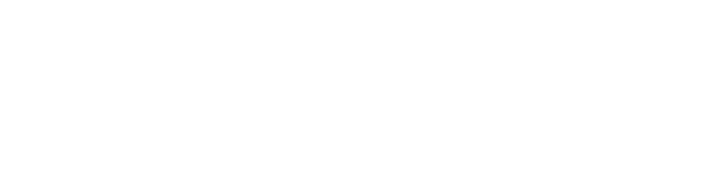

In [10]:
jogador = "CR7"

def millions(x, pos):
    'The two args are the value and tick position'
    return 'R$%1.0fM' % (x * 1e-6)

fig, ax = plt.subplots(figsize = (9, 2))

ax.plot(df_salarios.index, df_salarios[jogador].values, marker = "o", color = "white")
ax.spines[['right', 'top']].set_visible(False)

# formatter = FuncFormatter(millions)

# plt.xticks(rotation=45)
# ax.yaxis.set_major_formatter(formatter)
# ax.xaxis.set_ticks(np.arange(anos[0], anos[-1], 1))
plt.xticks(np.arange(anos[0], anos[-1] + 1, 1))

# xs = df_salarios.index
# ys = df_salarios[jogador].values


# for x,y in zip(xs,ys):

#     label = "R$" + "{:.0f}".format(y/1000000) + "MM"
    
#     if x == 2022 and jogador == "CR7":

#         plt.annotate(label, # this is the text
#                      (x + 0.15,y + 10000000), # these are the coordinates to position the label
#                      textcoords="offset points", # how to position the text
#                      xytext=(0,10), # distance from text to points (x,y)
#                      ha='left') # horizontal alignment can be left, right or center
        
#     else:
        
#         plt.annotate(label, # this is the text
#                      (x,y + 10000000), # these are the coordinates to position the label
#                      textcoords="offset points", # how to position the text
#                      xytext=(0,10), # distance from text to points (x,y)
#                     ha='center') # horizontal alignment can be left, right or center
        
ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])    

plt.savefig('cr7semnada.png', transparent=True)

In [71]:
print(df_salarios.sum())

Neymar    1.965077e+09
Messi     2.550303e+09
CR7       2.622280e+09
dtype: float64
